In [1]:
import torch
import pandas as pd

from finbert_func import score_sentence

c:\Users\thel0\OneDrive\Desktop\edgar sec stuff\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#check device torch is using (should be CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
tracked_companies = pd.read_csv('tracked_companies.csv', dtype={'cik_str': str})

tickers = tracked_companies['ticker']

In [4]:
test_ticker = 'nvda'

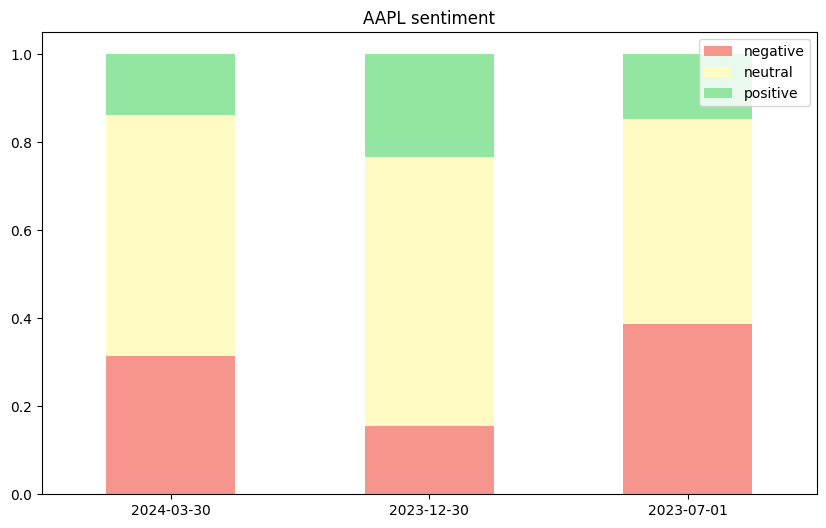

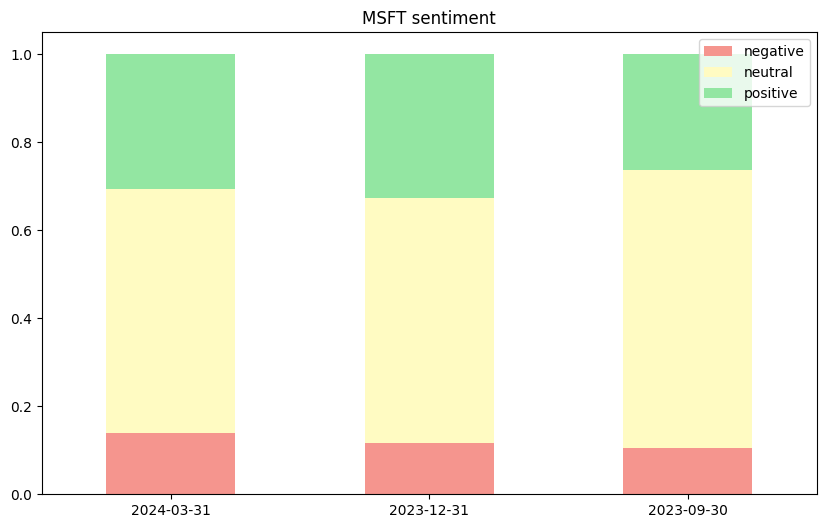

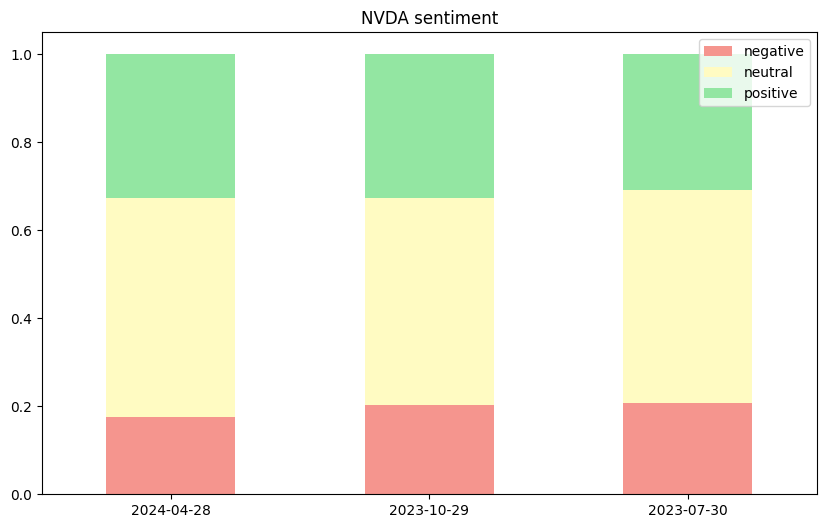

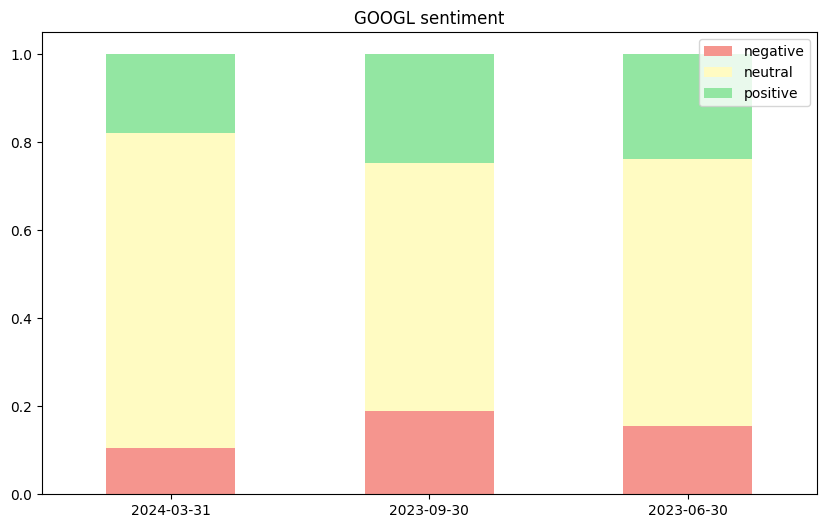

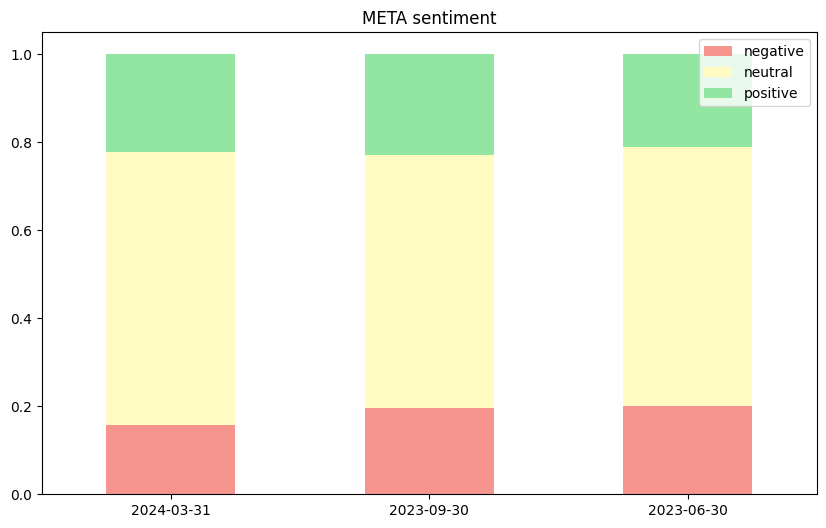

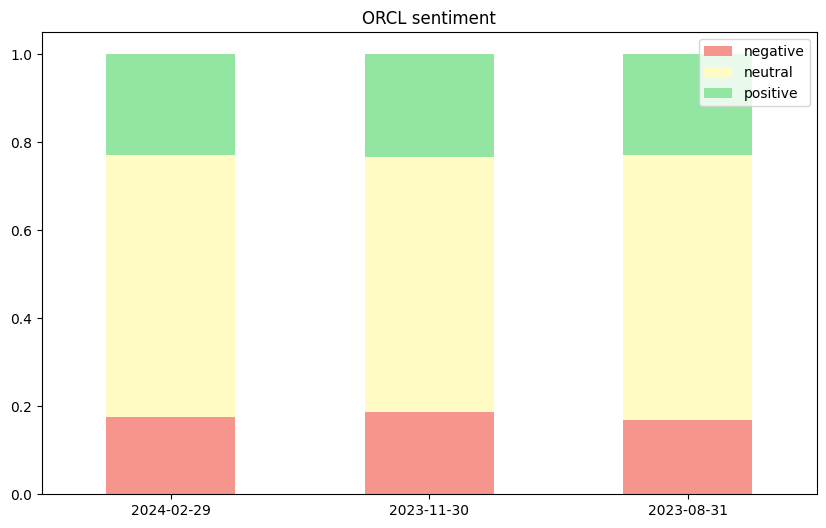

In [9]:
for company in tickers:

    test = pd.read_csv(f'mdna_text/{company}.csv')

    counts_df = pd.DataFrame()

    for index, row in test.iterrows():
        out_df = score_sentence(row['mdna'])

        counts_temp = out_df['label'].value_counts()

        counts_df = pd.concat([counts_df, counts_temp.rename(row['end_date'])/counts_temp.sum()], axis=1)

    counts_df  = counts_df.transpose()

    counts_df = counts_df.reindex(columns=['negative', 'neutral', 'positive'])

    ax = counts_df.plot(kind='bar', 
                    stacked=True, 
                    color= {'negative' : '#f5958e', 'neutral': '#fffbc2', 'positive': '#93e6a2'}, 
                    figsize=(10, 6),
                    rot= 0,
                    title = f'{company} sentiment')
    
    ax.figure.savefig(f'figures/{company}_sentiment_graphic.png')